# Visualization w/ Seaborn

# A. Exploring Seaborn Plots

### A.1 Histograms, KDE and Densities

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set() # seaborn's method to set its chart style

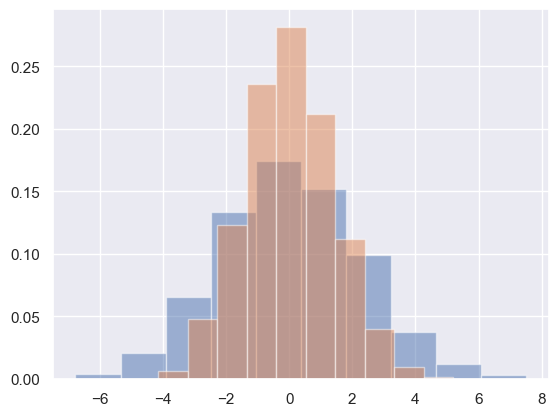

In [2]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

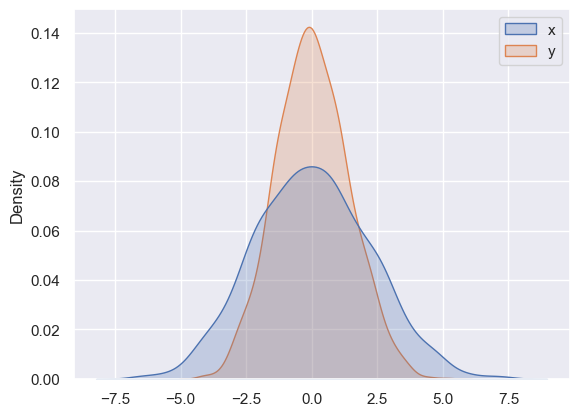

In [4]:
sns.kdeplot(data=data, fill=True);

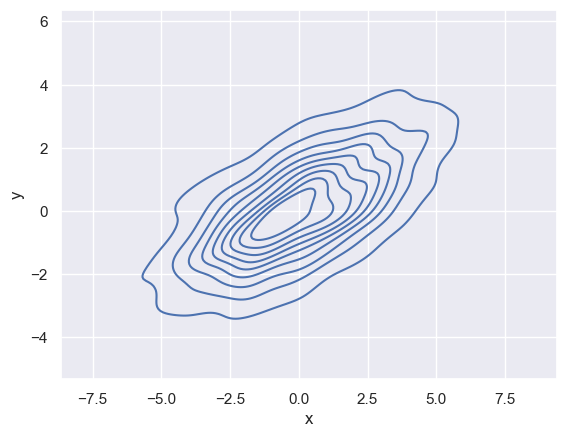

In [5]:
sns.kdeplot(data=data, x='x', y='y');

### A.2. Pair Plots

In [6]:
iris = sns.load_dataset("iris")

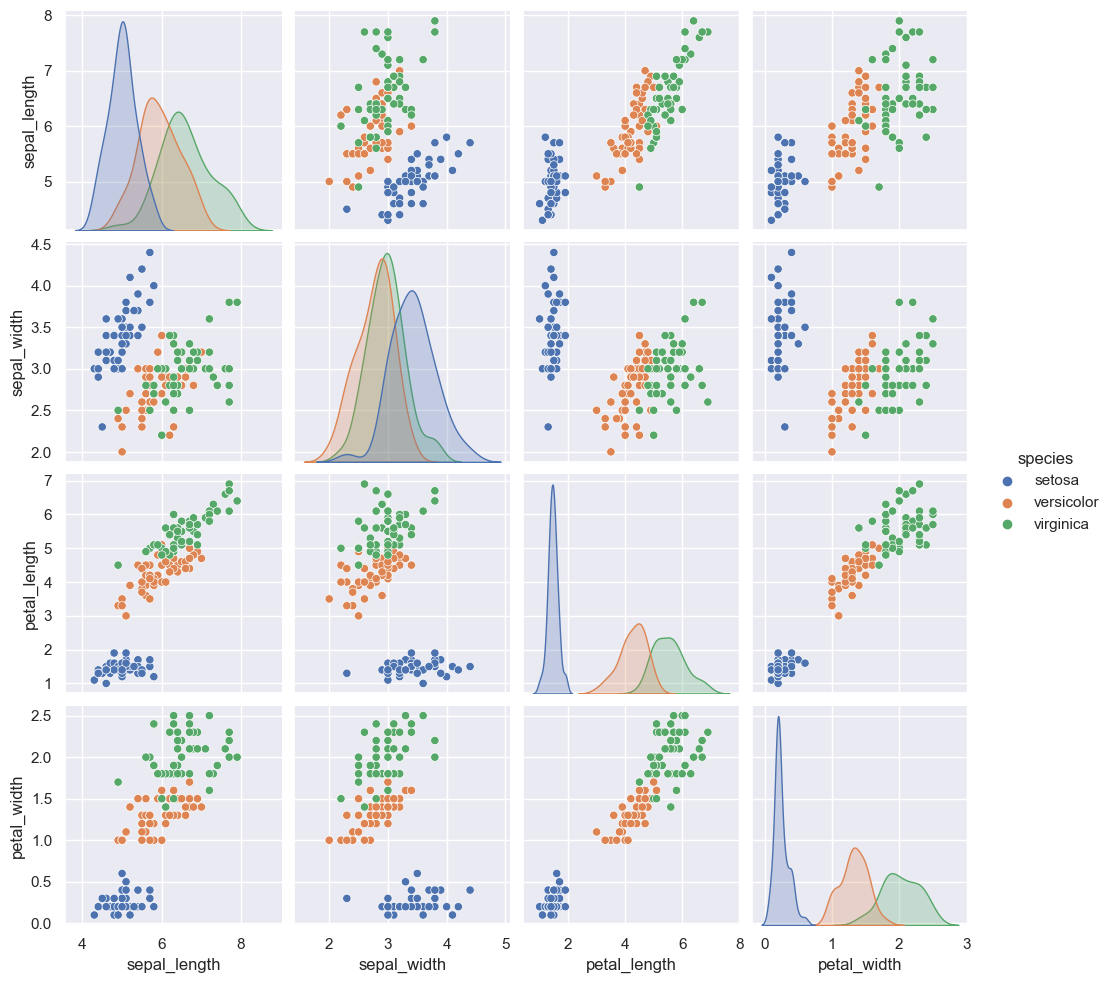

In [7]:
sns.pairplot(iris, hue='species', height=2.5);

### A.3. Faceted Histograms

In [8]:
tips = sns.load_dataset('tips')

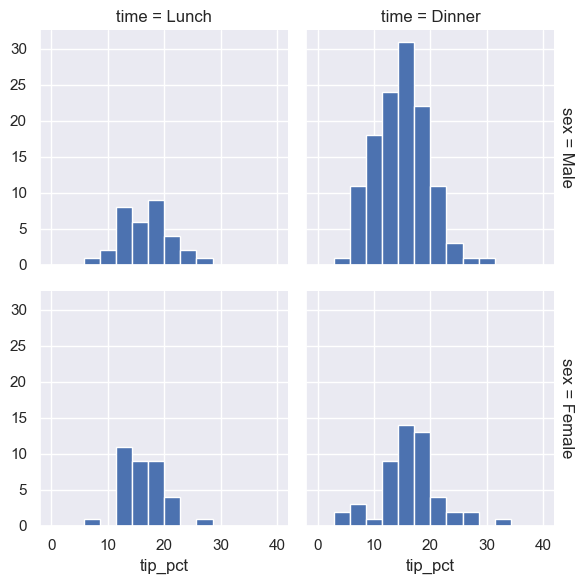

In [9]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

# B. Categorical Plots

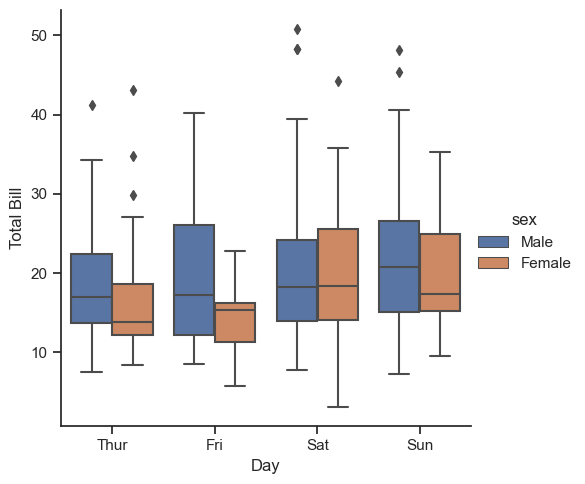

In [10]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### B.1. Joint Distributions

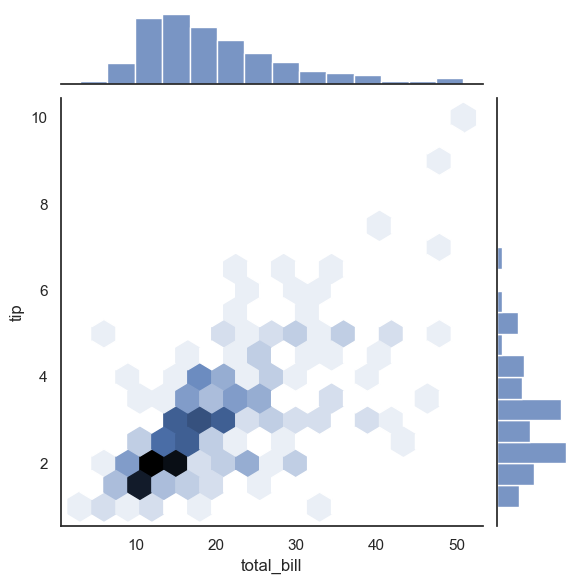

In [11]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

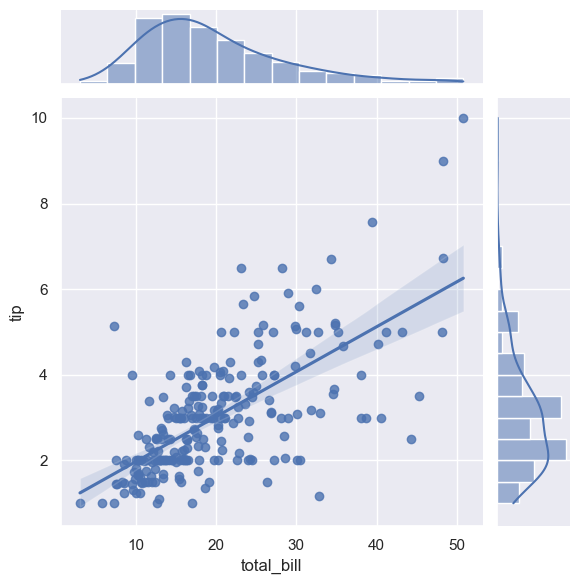

In [12]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

### B.2. Bar Plots

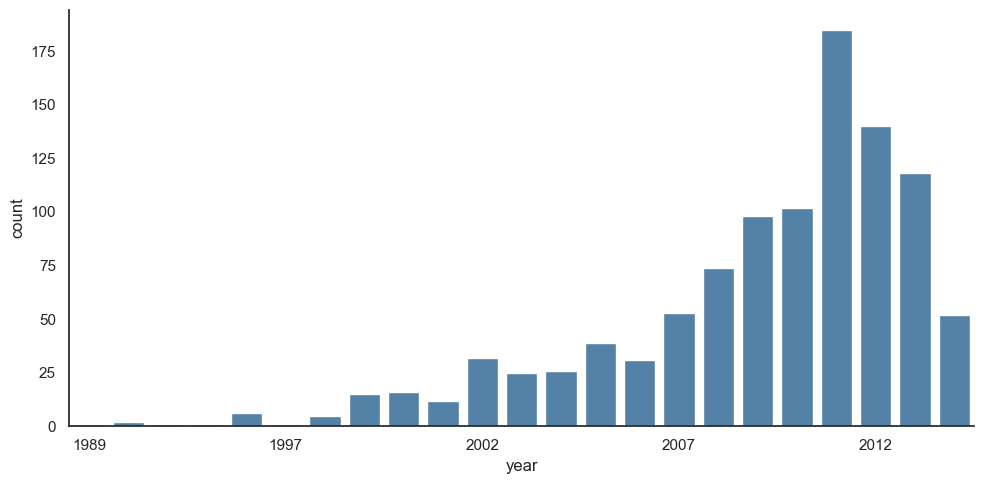

In [13]:
planets = sns.load_dataset('planets')

with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2, kind="count", color='steelblue')
    g.set_xticklabels(step=5)

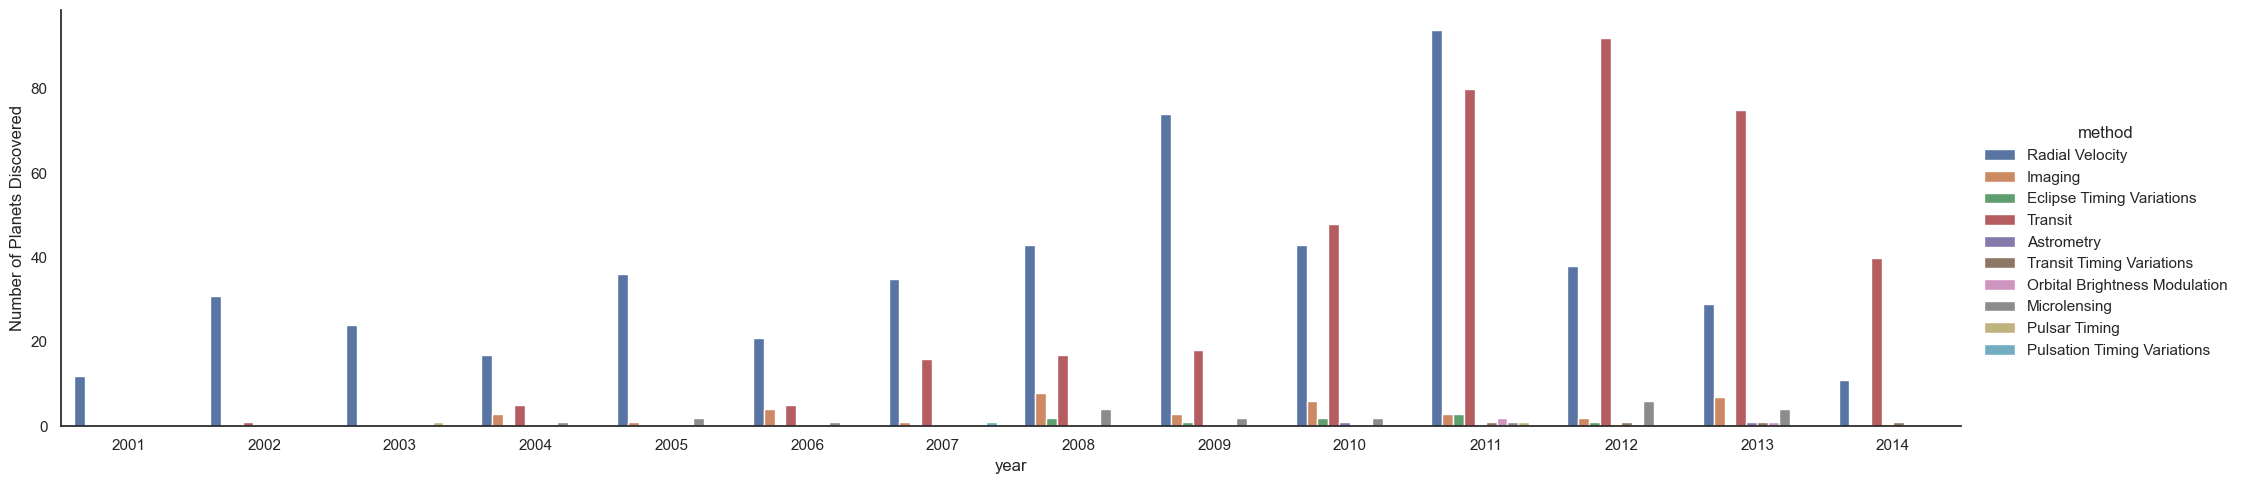

In [14]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count', hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

# C. Example: Exploring Marathon Finishing Times

In [15]:
url = 'https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv'
data = pd.read_csv(url)

In [16]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [23]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv(url,converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [35]:
data['split_sec'] = data['split'].dt.total_seconds()
data['final_sec'] = data['final'].dt.total_seconds()
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


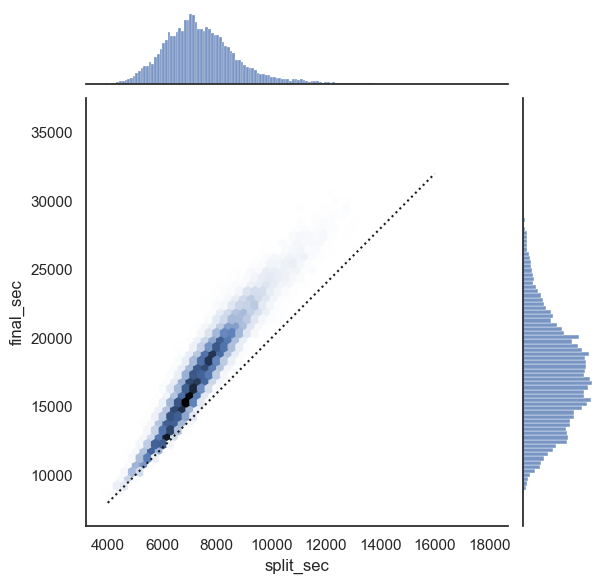

In [36]:
with sns.axes_style('white'):
    g = sns.jointplot(x='split_sec', y='final_sec', data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

In [37]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


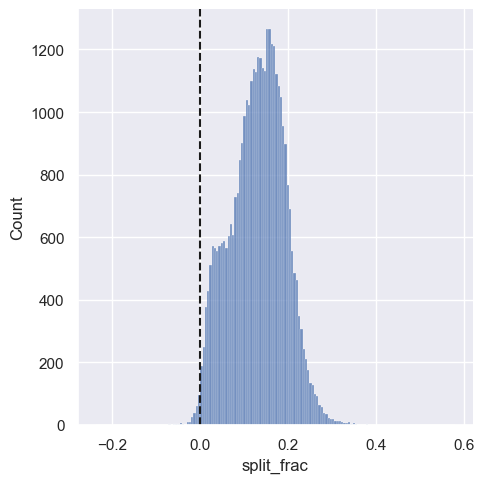

In [38]:
sns.displot(data['split_frac'], kde=False)
plt.axvline(0, color="k", linestyle="--");

In [39]:
sum(data.split_frac < 0)

251

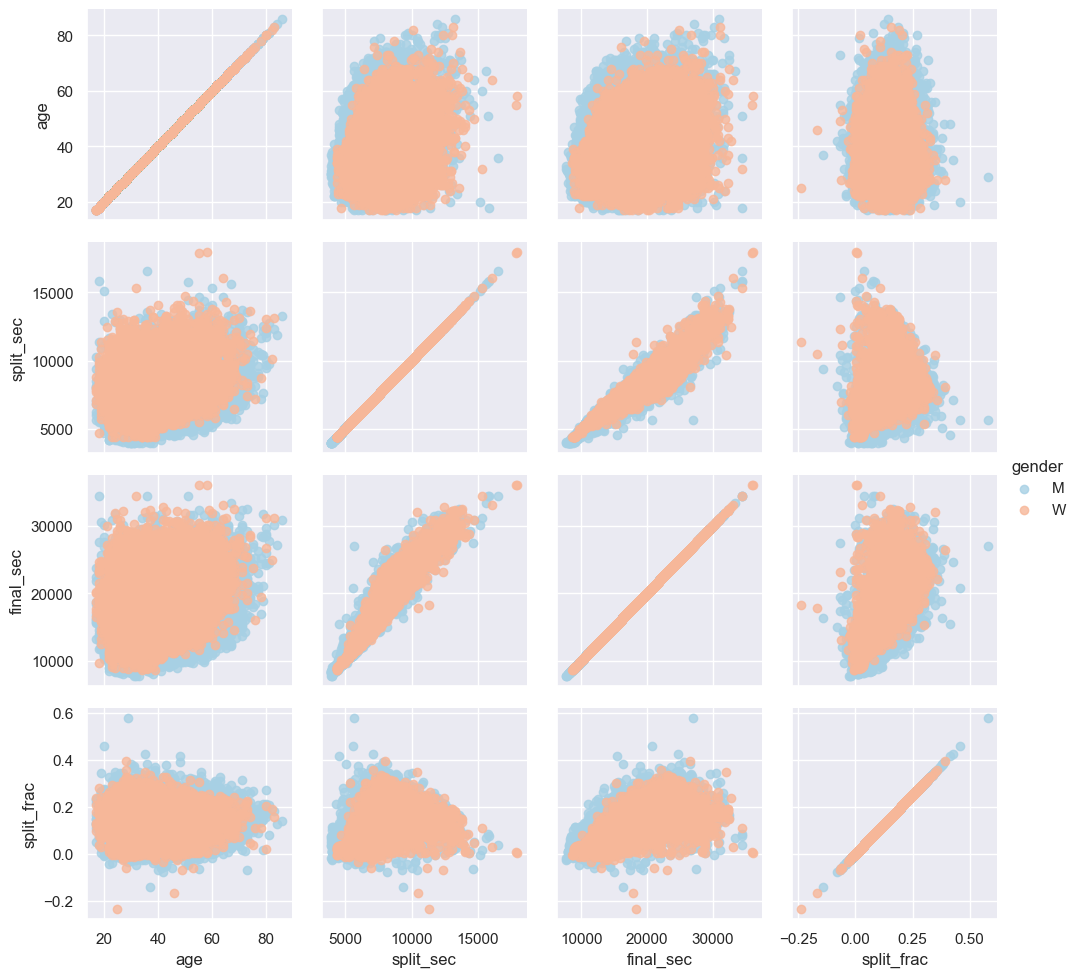

In [40]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

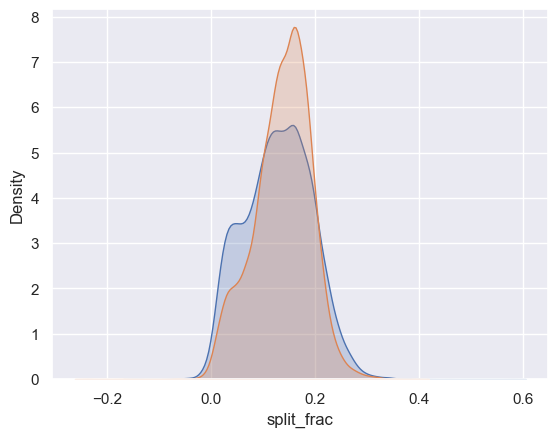

In [42]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', fill=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', fill=True)
plt.xlabel('split_frac');

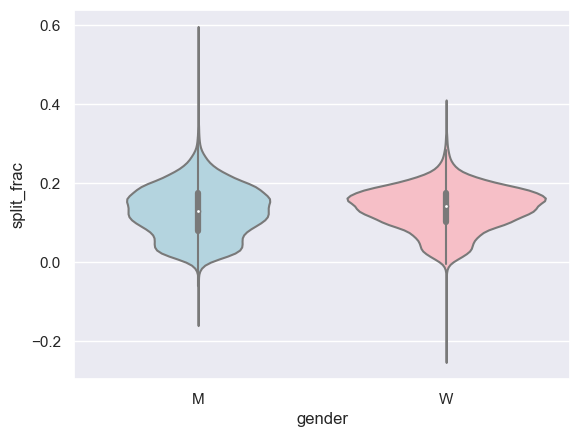

In [43]:
sns.violinplot(x="gender", y="split_frac", data=data, palette=["lightblue", "lightpink"]);

In [44]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


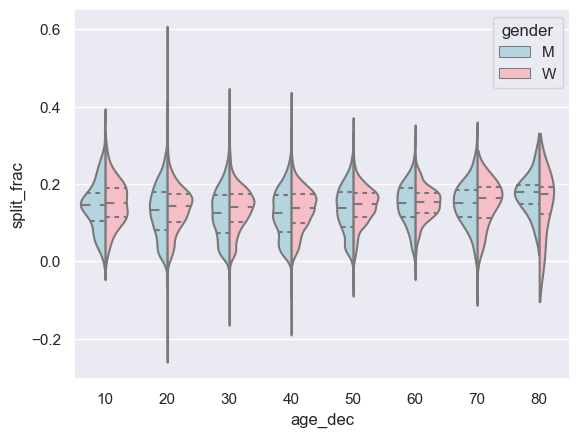

In [45]:
men = (data.gender == 'M')
women = (data.gender == 'W')
with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                    split=True, inner="quartile",
                    palette=["lightblue", "lightpink"]);

In [46]:
(data.age > 80).sum()

7

In [47]:
g= sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data, markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.0, color="k", ls=":");